In [2]:
# Import libraries
import geopandas as gpd
import matplotlib as mpl
import numpy as np

In [3]:
# For plot to appear in the notebook
%matplotlib inline 

# Import initial data

In [4]:
# Set the path to the original shapefile
admin1_shape="/media/tais/data/Dropbox/ULB/MAUPP/Coordination collaborateurs sur place/WP6_populeation_limitesadmin/Dakar_StLouis/Dakar_admin5_topological_clean/Dakar_units_core_cleaned.shp"

In [5]:
# Read the shapefile
gdf1 = gpd.read_file(admin1_shape) 

In [6]:
# Add two columns to the attribute table with x (long) and y (lat)
gdf1["x"] = gdf1.centroid.map(lambda p: p.x)
gdf1["y"] = gdf1.centroid.map(lambda p: p.y)

In [7]:
# Display the attribute table
gdf1.head()

,Department,Area4,Area5,Id_area5,Code,Commune,Quartier,CONCESSION,MENAGE,HOMME,FEMME,POPULATION,Shape_Leng,Shape_Area,geometry,x,y
0,PIKINE,MBAO,CITE NDEYE MARIE,1.230135e+11,1.230135e+11,Mbao,CITE NDEYE MARIE,310,343,1124,1142,2266,1455.303455,104294.145207,"POLYGON ((250391.4934 1629353.1556, 250319.658...",250415.671612,1629636.035596
1,PIKINE,MBAO,NDOYENE SOUF,1.230135e+11,1.230135e+11,Mbao,NDOYENE SOUF,55,124,545,575,1120,1091.641874,53131.494372,"POLYGON ((249750.3291999996 1629808.9005, 2497...",249673.014011,1629686.216988
2,PIKINE,MBAO,NDIOBENE,1.230135e+11,1.230135e+11,Mbao,NDIOBENE,92,123,542,508,1050,1215.072916,54988.418054,"POLYGON ((250113.2289000005 1629602.2348, 2501...",249951.172254,1629563.238497
3,PIKINE,MBAO,LAMSAR,1.230135e+11,1.230135e+11,Mbao,LAMSAR,65,131,498,460,958,798.618709,32725.663230,"POLYGON ((250155.7130000005 1629917.0689, 2501...",249989.434381,1629922.971439
4,PIKINE,MBAO,NDOYENE KAW,1.230135e+11,1.230135e+11,Mbao,NDOYENE KAW,115,172,740,753,1493,1149.657763,73620.459691,"POLYGON ((249878.8282000003 1630025.5766, 2498...",249696.999188,1629965.857461


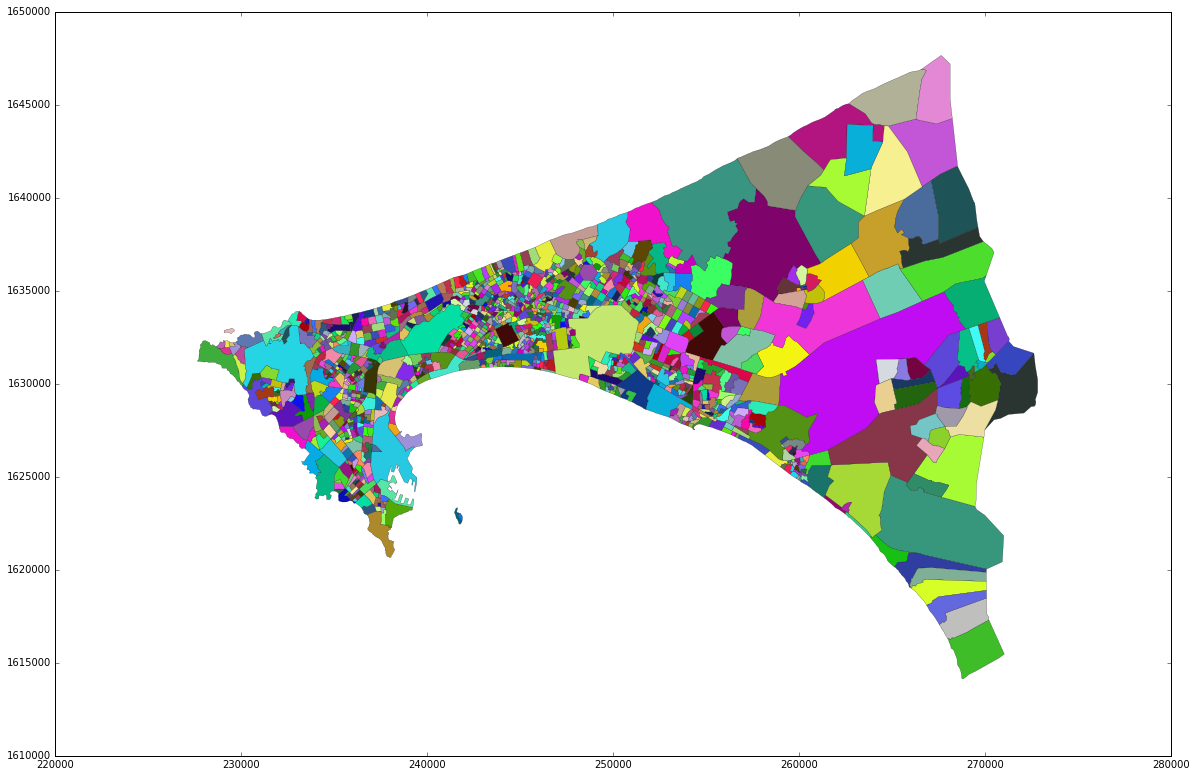

In [8]:
# A random colormap for matplotlib
cmap = mpl.colors.ListedColormap(np.random.rand(256,3))
# Display the shape
gdf1.plot(cmap=cmap, lw=0.2, figsize=(20,20))

# Kmeans clustering

In [9]:
# Getting the x/y values
f1 = gdf1['x'].values
f2 = gdf1['y'].values
X = np.array(list(zip(f1, f2)))

# Run Kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=150).fit(X) # Here you can change the number of clusters you desire
labels = kmeans.predict(X) # Getting the cluster labels

In [10]:
# Joint results to the attribute table
gdf1["cluster"] = labels
# Display the attribute table
gdf1.head()

,Department,Area4,Area5,Id_area5,Code,Commune,Quartier,CONCESSION,MENAGE,HOMME,FEMME,POPULATION,Shape_Leng,Shape_Area,geometry,x,y,cluster
0,PIKINE,MBAO,CITE NDEYE MARIE,1.230135e+11,1.230135e+11,Mbao,CITE NDEYE MARIE,310,343,1124,1142,2266,1455.303455,104294.145207,"POLYGON ((250391.4934 1629353.1556, 250319.658...",250415.671612,1629636.035596,9
1,PIKINE,MBAO,NDOYENE SOUF,1.230135e+11,1.230135e+11,Mbao,NDOYENE SOUF,55,124,545,575,1120,1091.641874,53131.494372,"POLYGON ((249750.3291999996 1629808.9005, 2497...",249673.014011,1629686.216988,24
2,PIKINE,MBAO,NDIOBENE,1.230135e+11,1.230135e+11,Mbao,NDIOBENE,92,123,542,508,1050,1215.072916,54988.418054,"POLYGON ((250113.2289000005 1629602.2348, 2501...",249951.172254,1629563.238497,24
3,PIKINE,MBAO,LAMSAR,1.230135e+11,1.230135e+11,Mbao,LAMSAR,65,131,498,460,958,798.618709,32725.663230,"POLYGON ((250155.7130000005 1629917.0689, 2501...",249989.434381,1629922.971439,24
4,PIKINE,MBAO,NDOYENE KAW,1.230135e+11,1.230135e+11,Mbao,NDOYENE KAW,115,172,740,753,1493,1149.657763,73620.459691,"POLYGON ((249878.8282000003 1630025.5766, 2498...",249696.999188,1629965.857461,24


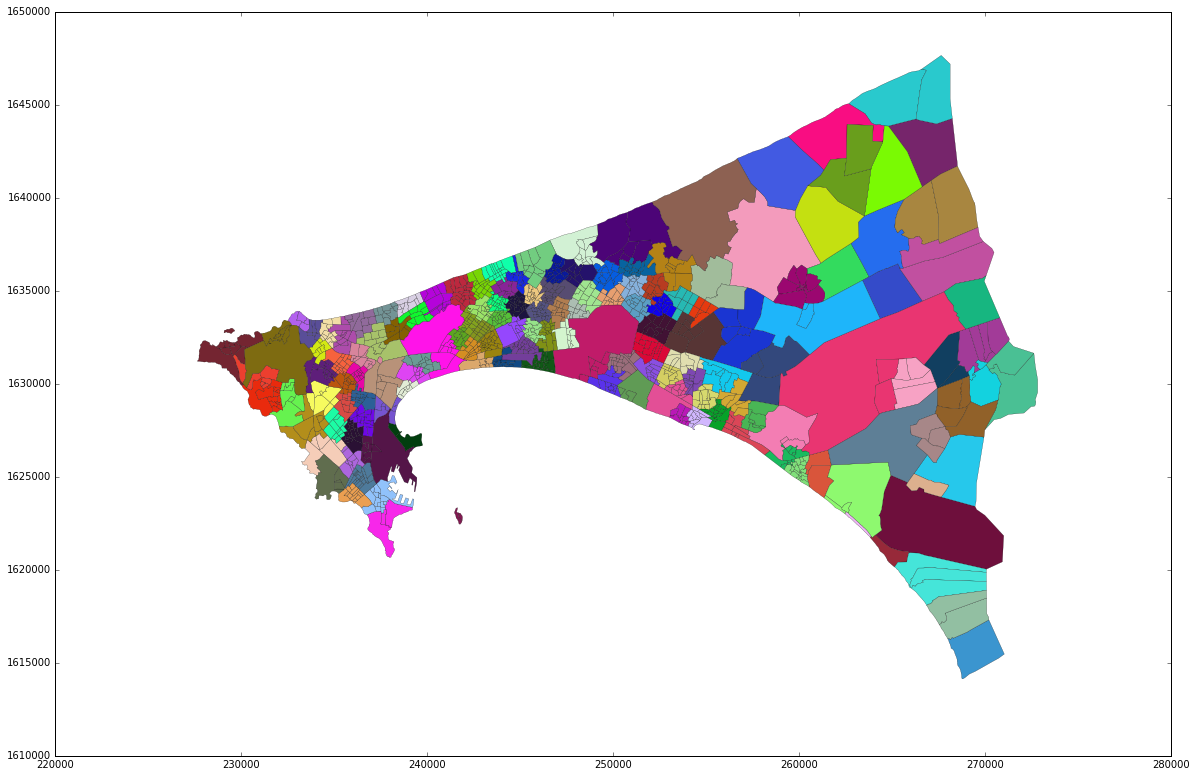

In [11]:
# A random colormap for matplotlib
cmap = mpl.colors.ListedColormap(np.random.rand(256,3))
# Display the shape
gdf1.plot(column='cluster', cmap=cmap, lw=0.2, figsize=(20, 20))  #Adapt the column according to your own data

# Dissolve admin1 level to get admin0 level

In [40]:
# Use dissolve function of Geopandas
gdf0 = gdf1.dissolve(by='cluster', aggfunc='sum', as_index=False)
# Drop columns that loose their mean by getting aggregated using 'sum' function
gdf0.drop(['Id_area5','Code', 'Shape_Leng', 'Shape_Area', 'x', 'y'], axis=1, inplace=True) #Adapt the column according to your own data
# Display the attribute table
gdf0.head()

,cluster,geometry,CONCESSION,MENAGE,HOMME,FEMME,POPULATION
0,0,"POLYGON ((256254.6646999996 1635296.068600001,...",1063,1271,5349,4947,10296
1,1,"POLYGON ((243148.8114 1630882.468599999, 24308...",816,1849,7155,6777,13932
2,2,"POLYGON ((235954.0318 1629668.5195, 235923.256...",2851,8218,21741,21749,43491
3,3,"POLYGON ((257281.0115999999 1627033.7359, 2573...",1841,3024,13651,14027,27677
4,4,"POLYGON ((249434.1272999998 1635122.954399999,...",2935,4067,16892,16713,33606


In [41]:
# Add count of admin1 unit in each cluster
count_units = gdf1.dissolve(by='cluster', aggfunc='count')['x']
gdf0['count'] = count_units
# Display the attribute table
gdf0.head()

,cluster,geometry,CONCESSION,MENAGE,HOMME,FEMME,POPULATION,count
0,0,"POLYGON ((256254.6646999996 1635296.068600001,...",1063,1271,5349,4947,10296,2
1,1,"POLYGON ((243148.8114 1630882.468599999, 24308...",816,1849,7155,6777,13932,7
2,2,"POLYGON ((235954.0318 1629668.5195, 235923.256...",2851,8218,21741,21749,43491,15
3,3,"POLYGON ((257281.0115999999 1627033.7359, 2573...",1841,3024,13651,14027,27677,10
4,4,"POLYGON ((249434.1272999998 1635122.954399999,...",2935,4067,16892,16713,33606,14


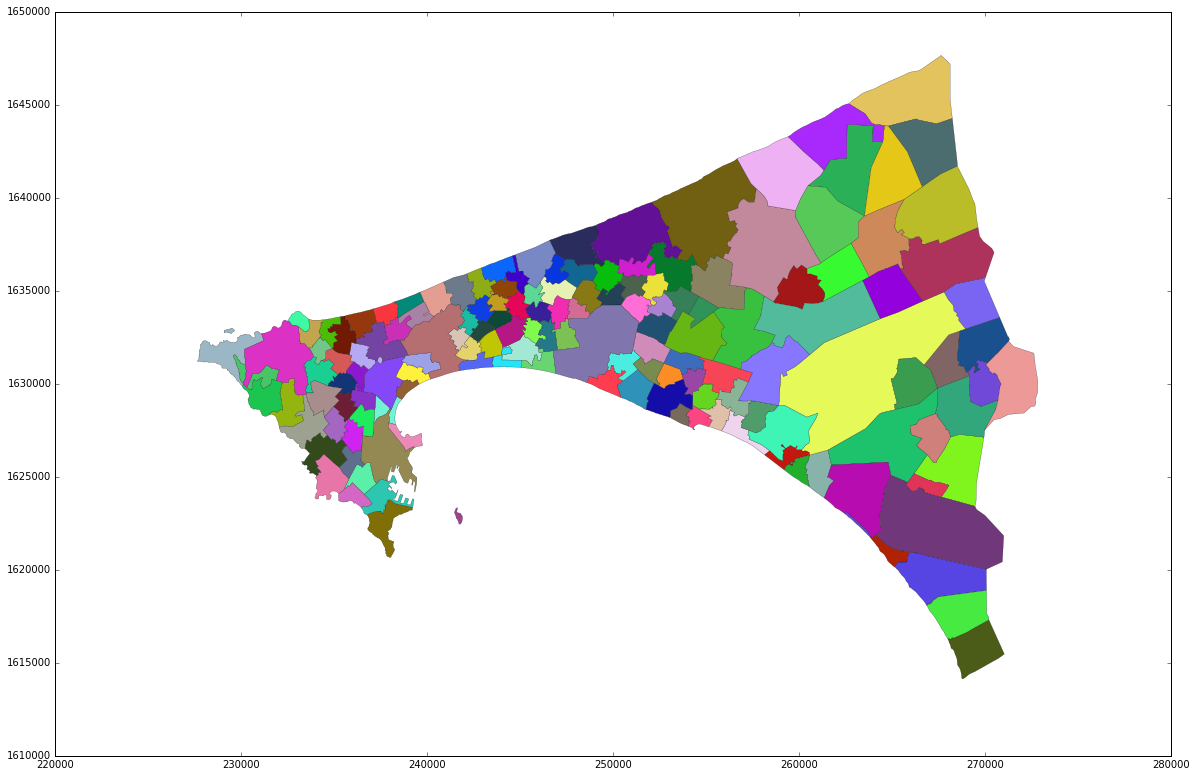

In [43]:
# A random colormap for matplotlib
cmap = mpl.colors.ListedColormap(np.random.rand(256,3))
# Display the shape
gdf0.plot(column='cluster', cmap=cmap, lw=0.2, figsize=(20, 20))  #Adapt the column according to your own data

## If cluster are compouned by 1 unit only, merge with the smallest neighborhinr cluster

In [44]:
# Check how many cluster are composed of only have one unit 
def check_size_cluster(df):
    number_one_unit_cluster = len(df.loc[df['count']<2])
    if number_one_unit_cluster > 0:
        return False

In [45]:
check_size_cluster(gdf0)

False

In [50]:
gdf0["NEIGHBORS"] = None  # Add empty NEIGHBORS column

for index, unit in gdf0.iterrows():   
    # get 'not disjoint' countries
    neighbors = gdf0[~gdf0.geometry.disjoint(unit.geometry)].cluster.tolist()
    # remove own name from the list
    neighbors = [str(Id) for Id in neighbors if unit.cluster != Id]
    # add names of neighbors as NEIGHBORS value
    gdf0.at[index, "NEIGHBORS"] = ", ".join(neighbors)

In [51]:
# Display the attribute table
gdf0.head()

,cluster,geometry,CONCESSION,MENAGE,HOMME,FEMME,POPULATION,count,NEIGHBORS
0,0,"POLYGON ((256254.6646999996 1635296.068600001,...",1063,1271,5349,4947,10296,2,"39, 54, 80, 83, 104, 125"
1,1,"POLYGON ((243148.8114 1630882.468599999, 24308...",816,1849,7155,6777,13932,7,"45, 87, 107, 139"
2,2,"POLYGON ((235954.0318 1629668.5195, 235923.256...",2851,8218,21741,21749,43491,15,"61, 63, 105, 110, 115, 126"
3,3,"POLYGON ((257281.0115999999 1627033.7359, 2573...",1841,3024,13651,14027,27677,10,"56, 69, 77, 114, 134"
4,4,"POLYGON ((249434.1272999998 1635122.954399999,...",2935,4067,16892,16713,33606,14,"23, 41, 42, 68, 76, 84, 122"


# Export admin1 shapefile

In [14]:
# Set the path to the shapefile to be created
shape_export = '/media/tais/My_Book_1/MAUPP/Traitement/Population_modelling_dasymetry/Results/Dakar/admin0.shp'
# Export
gdf0.to_file(driver='ESRI Shapefile',filename=shape_export)